# SOPHY Database
### Southern Ocean Phytoplankton Database
- Made by Ayush Nag and Hannah-Joy Warren (add others)
- UW Oceanography (add other credits)

In [1]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from pandas import DataFrame
import folium
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import fiona
import numpy as np
import shapely
import geolabel
import geopandas as gpd
import pyproj
from shapely.ops import transform
from matplotlib.colors import ListedColormap
import matplotlib.path as mpath

In [2]:
con = sqlite3.connect("sophy.db")
cur = con.cursor()

In [2]:
geolabel.create_fronts_zones_shapes()

Success! Shapefiles generated


C:\Users\Ayush Nag\miniconda3\envs\sophyenv\lib\site-packages\geopandas\geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 6 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(
C:\Users\Ayush Nag\AppData\Local\Temp\ipykernel_17036\3259697845.py:96: DtypeWarning: Columns (8,10,11,13,15,16,17,18,20,21,23,24,26,27,28,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  occ_df: DataFrame = pd.read_csv('../data/datasets/phytobase.csv', encoding='unicode_escape')
C:\Users\Ayush Nag\AppData\Local\Temp\ipykernel_17036\3259697845.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = sample_df.append([occ_df, alder_df], ignore_index=True)


<GeoAxesSubplot:>

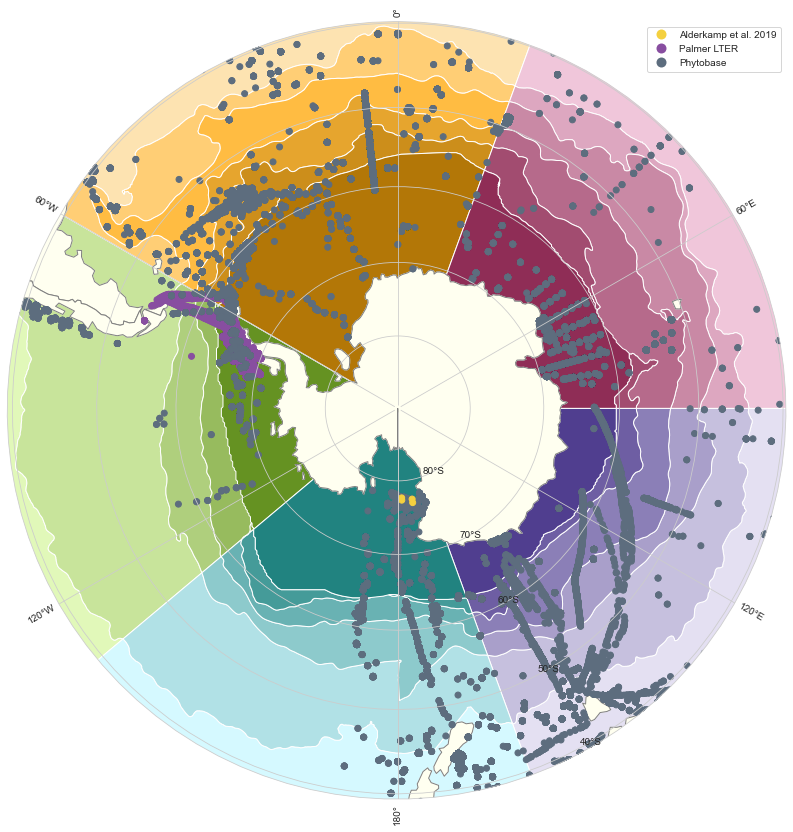

In [42]:
# Write some functions here that interact with sqlite and can plot the data
map_proj = ccrs.SouthPolarStereo()
project = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'), always_xy=True).transform
fig = plt.figure(figsize=[12, 12])  # inches
ax = plt.subplot(projection=map_proj)
# ax.set_facecolor('k')
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

# ax.add_feature(cartopy.feature.LAND)
ax.gridlines(draw_labels=True)

def plot_circle_boundary() -> None:
    """
    Make SO plot boundary a circle.
    Compute a circle in axes coordinates, which we can use as a boundary for the map.
    We can pan/zoom as much as we like - the boundary will be permanently circular.
    """
    theta  = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5  ## could use 0.45 here, as Simon Thomas did
    verts  = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform = ax.transAxes)

plot_circle_boundary()
# np.dstack((pie_lat, pie_lon))
s1 = transform(project, Polygon(zip(np.append(np.linspace(start=-130, stop=-60, num=1000), 0), np.append(np.full(1000, -30), -90))))
s2 = transform(project, Polygon(zip(np.append(np.linspace(start=-60, stop=20, num=1000), 0), np.append(np.full(1000, -30), -90))))
s3 = transform(project, Polygon(zip(np.append(np.linspace(start=20, stop=90, num=1000), 0), np.append(np.full(1000, -30), -90))))
s4 = transform(project, Polygon(zip(np.append(np.linspace(start=90, stop=160, num=1000), 0), np.append(np.full(1000, -30), -90))))
s5 = transform(project, Polygon(zip(np.append(np.append(np.linspace(start=160, stop=180, num=500), np.linspace(start=-180, stop=-130, num=500)), 0), np.append(np.full(1000, -30), -90))))
s: list = [s1, s2, s3, s4, s5]
sectors = gpd.GeoDataFrame(geometry=s, crs='EPSG:3031')
# xs, ys = p.exterior.xy
# ax.fill(xs, ys, alpha=0.1, fc='r', ec='none')

# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())

# Color shades
greens  = ['#659222', '#7EA640', '#97BB5E', '#AFCF7D', '#C8E49B', '#E1F8B9']
yellows = ['#B37707', '#CC8E1B', '#E6A52E', '#FFBC42', '#FFCE75', '#FDE3B1']
maroons = ['#8F2D56', '#A24C70', '#B66A8B', '#C989A5', '#DDA7C0', '#F0C6DA']
purples = ['#503E8F', '#6E5EA3', '#8B7FB7', '#A99FCA', '#C6C0DE', '#E4E0F2']
teals   = ['#218380', '#459B99', '#69B2B3', '#8DCACC', '#B1E1E6', '#D5F9FF']

greens.reverse()
yellows.reverse()
maroons.reverse()
purples.reverse()
teals.reverse()


# List of all colors
color_palette = greens + yellows + maroons + purples + teals

# Make color palette
my_map = ListedColormap(sns.color_palette(color_palette).as_hex())

zones: gpd.GeoDataFrame = gpd.read_file(geolabel.zones_shapefile)
zones.to_crs(epsg=3031, inplace=True)
res = zones.overlay(sectors, how='intersection')
res.plot(ax=ax, cmap=my_map, edgecolor='w', legend=True)
world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.to_crs(epsg=3031).plot(ax=ax, color='ivory', edgecolor='grey')

# ax.plot(177.5, -77, marker='o', color='b', transform=ccrs.PlateCarree())
# ax.plot(177.5, -77.317, marker='o', color='b', transform=ccrs.PlateCarree())
# ax.plot(171, -77, marker='o', color='b', transform=ccrs.PlateCarree())
# ax.plot(171, -76.5, marker='o', color='b', transform=ccrs.PlateCarree())

# zones.explore("front_zone", cmap=my_map)


# df = px.data.election()
# geojson = px.data.election_geojson()
# m = folium.Map(crs='EPSG3031')
# world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# zones.explore(column="front_zone", m=m)
# m.crs = 'EPSG3031'
# fig = px.choropleth(world, geojson=world.geometry,
#                     locations=world.index,
#                     color="pop_est",
#                     projection="cassini"
#                    )
# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()
sample_df: DataFrame = pd.read_csv('../data/datasets/lter.csv', encoding='unicode_escape')
sample_df = sample_df[['latitude', 'longitude']]
sample_df['source'] = 'Palmer LTER'
# data_gdf = gpd.GeoDataFrame(sample_df, geometry=gpd.points_from_xy(sample_df.longitude, sample_df.latitude), crs='EPSG:4326')
# data_gdf.to_crs(crs='EPSG:3031', inplace=True)
# data_gdf.plot(ax=ax, color='b')
# ['SAZ', 'PFZ', 'ASZ', 'SOZ', 'SIZ']

occ_df: DataFrame = pd.read_csv('../data/datasets/phytobase.csv', encoding='unicode_escape')
occ_df = occ_df[['latitude', 'longitude']]
occ_df = occ_df[occ_df['latitude'] < -30]
occ_df['source'] = 'Phytobase'
# data_gdf = gpd.GeoDataFrame(occ_df, geometry=gpd.points_from_xy(occ_df.longitude, occ_df.latitude), crs='EPSG:4326')
# data_gdf.to_crs(crs='EPSG:9354').plot(ax=ax)

alder_df: DataFrame = pd.read_csv('../data/datasets/alderkamp.csv', encoding='unicode_escape')
alder_df = alder_df[['latitude', 'longitude']]
alder_df['source'] = 'Alderkamp et al. 2019'

full_palette = ['#F4D03F', '#884EA0', '#5D6D7E']
full_colors = ListedColormap(sns.color_palette(full_palette).as_hex())
full = sample_df.append([occ_df, alder_df], ignore_index=True)
full_gdf = gpd.GeoDataFrame(full, geometry=gpd.points_from_xy(full.longitude, full.latitude), crs='EPSG:4326')
full_gdf.to_crs(crs='EPSG:3031').plot(ax=ax, cmap=full_colors, legend=True, column='source')